# Vasiliki Kostara, Chapter 10: Sensory Delay, Homework 3

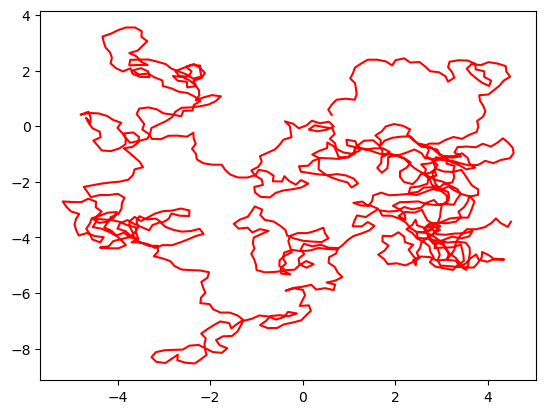

In [3]:
# 10.1 a)
import numpy as np
import matplotlib.pyplot as plt

n = 1          # number of robots (particles)
N = 1001       # number of time steps +1
tau = 2        # rotational diffusion timescale, 1/s
Vo = 10         
dt = 0.02

x = np.random.rand(n, N)
y = np.random.rand(n, N)
a = 2 * np.pi * np.random.randn(n, N)  # angle

for i in range(N-1):
    x[:,i+1] = (x[:,i] + dt * Vo * np.cos(a[:,i]))
    y[:,i+1] = (y[:,i] + dt * Vo * np.sin(a[:,i]))
    a[:,i+1] = a[:,i] + np.sqrt(2/tau) * np.random.randn(n)

plt.plot(x[0, :],y[0, :], color='red');


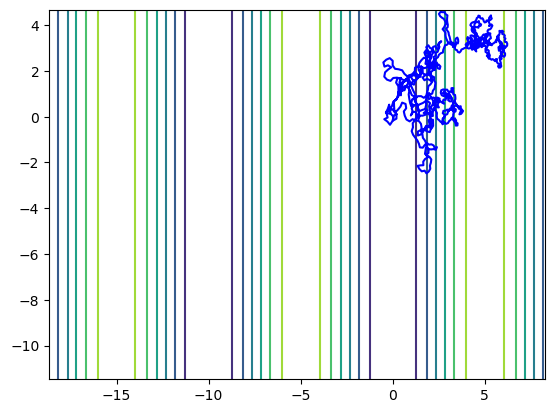

In [4]:
# 10.1. b) INTENSITY ONLY ALONG X

n = 1          
N = 1001       
tau = 2        
Vo = 10         
dt = 0.02

L = Vo * tau
lamda = [0.1*L, L, 10*L]
n_lamda = len(lamda)
Vinf = 0.01

x = np.random.rand(n_lamda, n, N)
y = np.random.rand(n_lamda, n, N)
a = 2 * np.pi * np.random.randn(n_lamda, n, N)  # angle
V = np.zeros([n_lamda, n, N])
I = np.zeros([n_lamda, n, N])

                    
for i_lamda in range(n_lamda):    
    for i in range(N-1):
        I[i_lamda,:,i] = (np.sin(2 * np.pi * x[i_lamda,:,i]/ lamda[i_lamda]))**2
        V[i_lamda,:,i] = Vinf + (Vo - Vinf) * np.exp(-I[i_lamda,:,i])
        x[i_lamda,:,i+1] = x[i_lamda,:,i] + dt * V[i_lamda,:,i] * np.cos(a[i_lamda,:,i]) 
        y[i_lamda,:,i+1] = y[i_lamda,:,i] + dt * V[i_lamda,:,i] * np.sin(a[i_lamda,:,i]) 
        a[i_lamda,:,i+1] = a[i_lamda,:,i] + np.sqrt(2/tau) * np.random.randn(n)

wavelength = L
def WaveIntensity(x,y):
    intensity_ = (np.sin(2 * np.pi * x / wavelength))**2
    return intensity_

xMax = np.max(x)
xMin = np.min(x)
yMax = np.max(y)
yMin = np.min(y)

x_ = np.linspace(xMin -0.1, xMax +0.1, 100)
y_ = np.linspace(yMin -0.1, yMax +0.1, 100)
X, Y = np.meshgrid(x_, y_)

intensity_ = []
for i,j in zip(X,Y):
    intensity1 = WaveIntensity(i,j)
    intensity_.append(intensity1)
    
plt.contour(X,Y,intensity_)
plt.plot(x[1, 0, :],y[1, 0, :], color='blue')


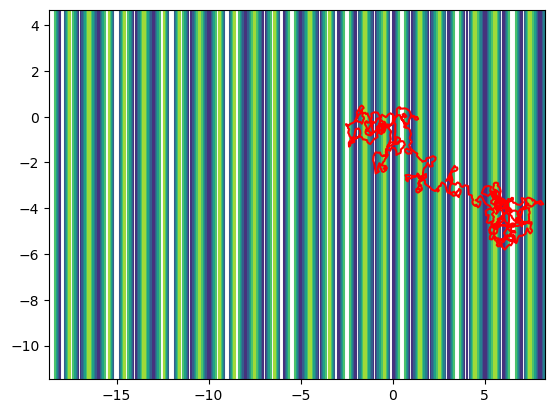

In [5]:
wavelength = 0.1*L

def WaveIntensity(x,y):
    intensity_ = (np.sin(2 * np.pi * x / wavelength))**2
    return intensity_

x_ = np.linspace(xMin -0.1, xMax +0.1, 100)
y_ = np.linspace(yMin -0.1, yMax +0.1, 100)
X, Y = np.meshgrid(x_, y_)

intensity_ = []
for i,j in zip(X,Y):
    intensity1 = WaveIntensity(i,j)
    intensity_.append(intensity1)
    
plt.contour(X,Y,intensity_)
plt.plot(x[0, 0, :],y[0, 0, :], color='red')

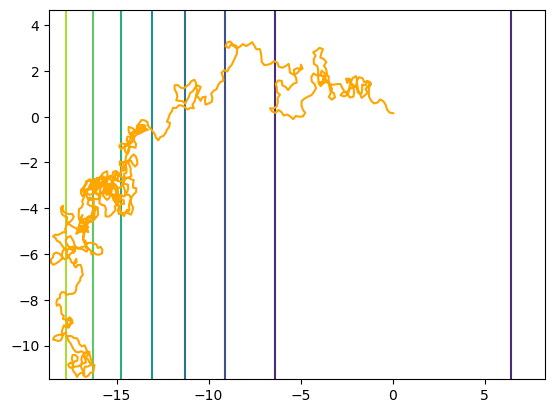

In [6]:
wavelength = 10*L
def WaveIntensity(x,y):
    intensity_ = (np.sin(2 * np.pi * x / wavelength))**2
    return intensity_

xMax = np.max(x)
xMin = np.min(x)
yMax = np.max(y)
yMin = np.min(y)

x_ = np.linspace(xMin -0.1, xMax +0.1, 100)
y_ = np.linspace(yMin -0.1, yMax +0.1, 100)
X, Y = np.meshgrid(x_, y_)

intensity_ = []
for i,j in zip(X,Y):
    intensity1 = WaveIntensity(i,j)
    intensity_.append(intensity1)
    
plt.contour(X,Y,intensity_)
plt.plot(x[2, 0, :],y[2, 0, :], color='orange')

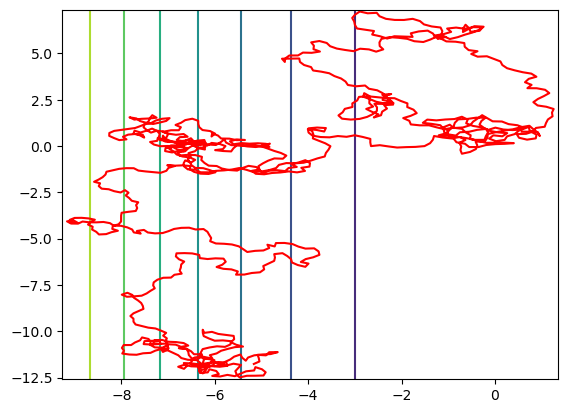

In [7]:
# 10.1. c) INTENSITY ONLY ALONG X
import numpy as np
import matplotlib.pyplot as plt
n = 1
N = 1001       
tau = 2        
Vo = 10         
dt = 0.02
Vinf = 0.01

L = Vo * tau
c = 0.001*Vo #3 * 10**8                # m/s
wavelength = 5*L   # m

x = np.random.rand(n, N)
y = np.random.rand(n, N)
a = 2 * np.pi * np.random.randn(n, N)  # angle
V = np.zeros([n,N])
I = np.zeros([n,N])

for i in range(N-1):
    I[:,i] = (np.sin(2 * np.pi * (x[:,i] - c * i*dt) / wavelength))**2
    V[:,i] = Vinf + (Vo - Vinf) * np.exp(-I[:,i])
    x[:,i+1] = x[:,i] + dt * V[:,i] * np.cos(a[:,i]) 
    y[:,i+1] = y[:,i] + dt * V[:,i] * np.sin(a[:,i])
    a[:,i+1] = a[:,i] + np.sqrt(2/tau) * np.random.randn(n)
    
def WaveIntensity(x,y):
    intensity_ = (np.sin(2 * np.pi * (x - c * dt*(N-1)) / wavelength))**2
    return intensity_

xMax = np.max(x)
xMin = np.min(x)
yMax = np.max(y)
yMin = np.min(y)

x_ = np.linspace(xMin -0.1, xMax +0.1, 100)
y_ = np.linspace(yMin -0.1, yMax +0.1, 100)
X, Y = np.meshgrid(x_, y_)

intensity_ = []
for i,j in zip(X,Y):
    intensity1 = WaveIntensity(i,j)
    intensity_.append(intensity1)
    
plt.contour(X,Y,intensity_)
plt.plot(x[0, :],y[0, :], color='red');


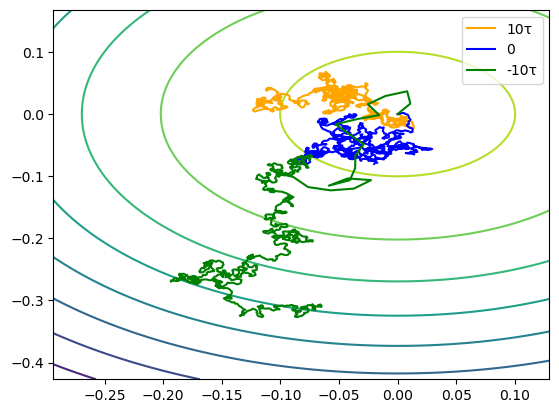

In [20]:
# 10.2. a)
import numpy as np
import matplotlib.pyplot as plt

n = 1         # number of robots (particles)
N = 1001      # number of time steps +1
tau = 2       # rotational diffusion timescale, 1/s
dt = 0.02     # time step, s
Io = 10       # Watt
ro = 1        # m
Vo = 1        # m/s
Vinf = 0.1    # m/s

delta = [-10*tau, 0, 10*tau]
n_delta = len(delta)
x = np.zeros([n_delta, n, N])
y = np.zeros([n_delta, n, N])
a = 2 * np.pi *np.random.randn(n_delta, n, N)
V = np.zeros([n_delta, n, N])
I = np.zeros([n_delta, n, N])
r = np.zeros([n_delta, n, N])
r_mean = []

for i_delta in range(n_delta):
    for i in range(N-1):
        r[i_delta,:,i] = np.sqrt(x[i_delta,:, i]**2 + y[i_delta,:, i]**2)
        I[i_delta,:,i] = Io * np.exp(-r[i_delta,:, i]**2 / ro**2)
        
        if delta[i_delta]>=0:
            V[i_delta,:,i] = Vinf + (Vo - Vinf) * np.exp(-I[i_delta,:,i-(delta[i_delta])])
        else:
            V[i_delta,:,i] = (Vinf + (Vo - Vinf) * np.exp(-I[i_delta,:,i] + 
                                                          delta[i_delta]*(I[i_delta,:,i] - I[i_delta,:,i+1])))
        
        x[i_delta,:,i+1] = x[i_delta,:,i] + dt * V[i_delta,:,i] * np.cos(a[i_delta,:,i]) 
        y[i_delta,:,i+1] = y[i_delta,:,i] + dt * V[i_delta,:,i] * np.sin(a[i_delta,:,i])
        a[i_delta,:,i+1] = a[i_delta,:,i] + np.sqrt(2/tau) * np.random.randn(n)

        r_mean.append(np.mean(r[i_delta, :, i]))

def GaussianIntensity(x,y):
    intensity_ = Io*np.exp(-((x)**2+(y)**2)/ro**2)
    return intensity_

xMin = np.min(x)
yMin = np.min(y)
xMax = np.max(x)
yMax = np.max(y)

x_ = np.linspace(xMin -0.1, xMax +0.1, 100)
y_ = np.linspace(yMin -0.1, yMax +0.1, 100)

X, Y = np.meshgrid(x_, y_)

intensity_ = []
for i,j in zip(X,Y):
    intensity1 = GaussianIntensity(i,j)
    intensity_.append(intensity1)

plt.contour(X,Y,intensity_)
plt.plot(x[0, 0, :],y[0, 0, :], color='green')
plt.plot(x[1, 0, :],y[1, 0, :], color='blue')
plt.plot(x[2, 0, :],y[2, 0, :], color='orange')
plt.legend(['-10τ','0','10τ'])
plt.show()


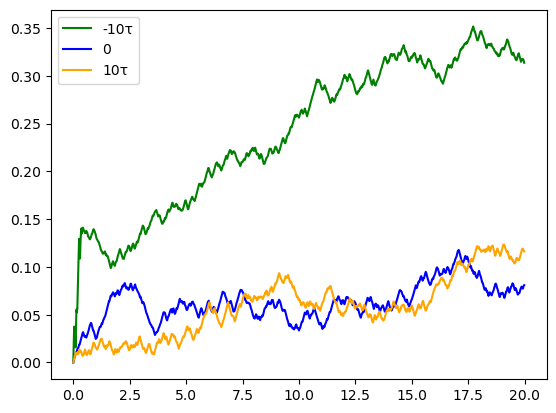

In [22]:
t_ = dt * np.linspace(0, N-2, N-1)

plt.plot(t_,r_mean[0: N-1], color='green')
plt.plot(t_,r_mean[N-1: 2*(N-1)], color='blue')
plt.plot(t_,r_mean[2*(N-1): 3*(N-1)], color='orange')
plt.legend(['-10τ','0','10τ'])
plt.show()


-250 10000


C:\Users\Vasiliki\AppData\Local\Temp\ipykernel_13832\3791614545.py:69: RuntimeWarning: invalid value encountered in true_divide
  tau * (V[i_delta,:,i])**2 / r[i_delta,:, i])


0 10000
250 10000


C:\Users\Vasiliki\AppData\Local\Temp\ipykernel_13832\3791614545.py:69: RuntimeWarning: divide by zero encountered in true_divide
  tau * (V[i_delta,:,i])**2 / r[i_delta,:, i])


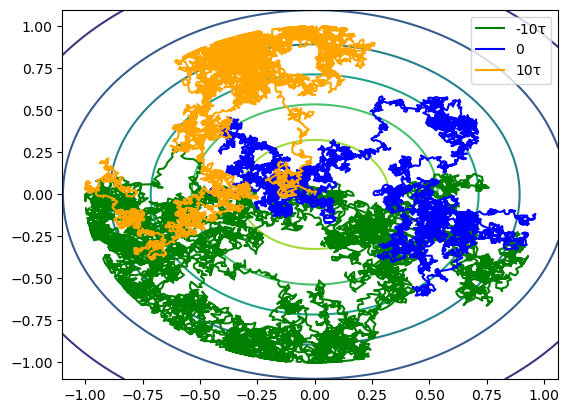

In [23]:
# 10.3. CONFINED
#a)
import numpy as np
import matplotlib.pyplot as plt

n = 1         # number of robots (particles)
N = 10000     # number of time steps +1
tau = 0.5       # rotational diffusion timescale, 1/s
dt = 0.02     # time step, s
Io = 1          # Watt
ro = 1        # m
Vo = 1         # m/s
Vinf = 0.1    # m/s
R = 1       # m

delta = [-10*tau, 0, 10*tau]

n_delta = len(delta)
#R = R * np.ones([n_delta, n, N])   # for multiple robots and delays

x = np.zeros([n_delta, n, N])
y = np.zeros([n_delta, n, N])
a = 2 * np.pi * np.random.randn(n_delta, n, N)
V = np.zeros([n_delta, n, N])
I = np.zeros([n_delta, n, N])
r = np.zeros([n_delta, n, N])
V_derivative = np.zeros([n_delta, n, N])
D = np.zeros([n_delta, n, N])


for i_delta in range(n_delta):
    
    delay = int(delta[i_delta] / dt)
    print(delay, N)
    for i in range(N-1):
        if not (0 <= i - delay < N):
            continue

        r_ = np.sqrt(x[i_delta,:, i]**2 + y[i_delta,:, i]**2)
        
        if r_ > R:
            x[i_delta,:,i] = x[i_delta,:,i] * R / r_
            y[i_delta,:,i] = y[i_delta,:,i] * R / r_
            r_ = np.sqrt(x[i_delta,:, i]**2 + y[i_delta,:, i]**2)
            
        r[i_delta,:, i] = r_
            
        I[i_delta,:,i] = Io * np.exp(-r_**2 / ro**2)
        
        intensity = I[i_delta, :, i-delay]
        #if 0 <= i - delay < N:
        #    intensity = I[i_delta, :,i-delay]
        #else:
        #    intensity = Io

        V[i_delta,:,i] = Vinf + (Vo - Vinf) * np.exp(-intensity)
        
        x[i_delta,:,i+1] = x[i_delta,:,i] + dt * V[i_delta,:,i] * np.cos(a[i_delta,:,i]) 
        y[i_delta,:,i+1] = y[i_delta,:,i] + dt * V[i_delta,:,i] * np.sin(a[i_delta,:,i])
        a[i_delta,:,i+1] = a[i_delta,:,i] + np.sqrt(2/tau) * np.random.randn(n)
        
        V_derivative[i_delta,:,i] = ((2 * Io * (Vo - Vinf) / ro**2) *  
                                     np.exp(-intensity - (r_ / ro)**2))
        
    r[i_delta,:, -1] = np.sqrt((x[i_delta,:, -1])**2 + y[i_delta,:, -1]**2)
        
    for i in range(1,N):
        D[i_delta,:,i] = ((tau * (1 - delta[i_delta]/tau) * V[i_delta,:,i] * V_derivative[i_delta,:,i]) / 2 + 
                           tau * (V[i_delta,:,i])**2 / r[i_delta,:, i])

def GaussianIntensity(x,y):
    intensity_ = Io*np.exp(-((x)**2+(y)**2)/ro**2)
    return intensity_

xMin = np.min(x)
yMin = np.min(y)
xMax = np.max(x)
yMax = np.max(y)

x_ = np.linspace(xMin -0.1, xMax +0.1, 100)
y_ = np.linspace(yMin -0.1, yMax +0.1, 100)

X, Y = np.meshgrid(x_, y_)

intensity_ = []
for i,j in zip(X,Y):
    intensity1 = GaussianIntensity(i,j)
    intensity_.append(intensity1)
    
plt.contour(X,Y,intensity_)
plt.plot(x[0, 0, :],y[0, 0, :], color='green')
plt.plot(x[1, 0, :],y[1, 0, :], color='blue')
plt.plot(x[2, 0, :],y[2, 0, :], color='orange')
plt.legend(['-10τ','0','10τ'])
plt.show()


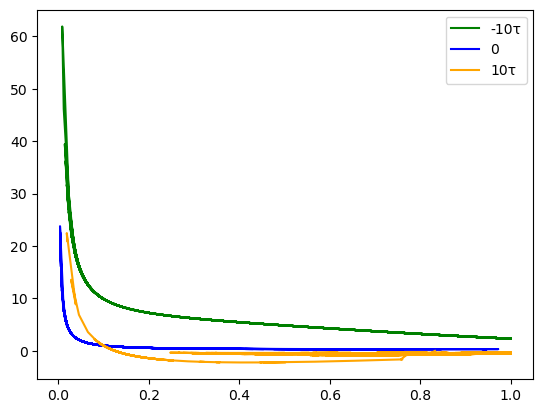

In [24]:
plt.plot(r[0, 0, 1:],D[0, 0, 1:], color='green')
plt.plot(r[1, 0, 1:],D[1, 0, 1:], color='blue')
plt.plot(r[2, 0, 1:],D[2, 0, 1:], color='orange')
plt.legend(['-10τ','0','10τ'])


In [1]:
# 10.4 
import numpy as np 
from numpy import arctan2 as atan2, sin, cos
import matplotlib.pyplot as plt
from IPython import display
from scipy.constants import Boltzmann as kB 
from tkinter import *
from tkinter import ttk
from PIL import ImageGrab
import time

resolution = 700      
tk = Tk()
tk.geometry( str(int(resolution*1.1)) + 'x'  +  str(int(resolution*1.3)) )
tk.configure(background='white')

canvas = Canvas(tk, bd=2)            
tk.attributes('-topmost', 0)
canvas.place(x=resolution/20, y=resolution/20, height= resolution, width= resolution)


delay_slider = Scale(tk, from_=-10, to=10, orient=HORIZONTAL, label='Sensory Delay')
delay_slider.place(relx=.5, rely=.84, relheight= 0.12, relwidth= 0.2)
delay_slider.set(0)


n = 50   
R = 0.5
r0 = 1
L = 10
N = 10005   
dt = 0.01     
V0 = 2
Vinf = 0.05
Tau = 2     
I0 = 5

rescale = resolution/L/2

x = (np.random.rand(n,N)*2-1) * L
y = (np.random.rand(n,N)*2-1) * L 
a = np.random.rand(n,N)*2*np.pi
I = np.zeros((n,N))

particles = []
for j in range(n):     
    particles.append( canvas.create_oval( (x[j,0] - R + L) * rescale, \
                                          (y[j,0] - R + L) * rescale, \
                                          (x[j,0] + R + L) * rescale, \
                                          (y[j,0] + R + L) * rescale, \
                                          outline='#fc0a87', fill='#f0fc0a') )
    
for i in range(N):
    delta = delay_slider.get()

    for j in range(n):
        I[j,i] = np.sum(I0*np.exp((-(x[j,i]-x[:,i])**2-(y[j,i]-y[:,i])**2)/r0**2)) - I0
        
    if delta>=0:
        V = Vinf + (V0-Vinf)*np.exp(-I[:,i-delta])            
    else:
        V = Vinf + (V0-Vinf)*np.exp(-(I[:,i]-delta*(I[:,i]-I[:,i-1]))) 
        
    x[:,i+1] = (x[:,i] + V*np.cos(a[:,i])*dt +L) % (2*L) - L
    y[:,i+1] = (y[:,i] + V*np.sin(a[:,i])*dt +L) % (2*L) - L
    a[:,i+1] = a[:,i] + np.sqrt(2/Tau)*np.random.randn(n)

    for j in range(n):
        canvas.move(particles[j], (x[j,i+1]-x[j,i]) *rescale, (y[j,i+1]-y[j,i])*rescale)     
    tk.title('t =' + str(round(i*dt*100)/100))          
    tk.update()                                         
    if i<10:
        time.sleep(0.1)                              
    
Tk.mainloop(canvas)                                   

IndexError: index 10005 is out of bounds for axis 1 with size 10005

In [25]:
!jupyter nbconvert --to webpdf --allow-chromium-download Sensory_Delay.ipynb

[NbConvertApp] Converting notebook Sensory_Delay.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 577911 bytes to Sensory_Delay.pdf
